In [2]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from tqdm import tqdm

In [3]:
from IPython.display import IFrame, display
file = 'Lectures/.pdf'
#IFrame(file, width=550, height=400)

In [27]:
class MyRandom():
    def __init__(self, seed = 15, method="simple"):
        self.r = seed
        self.method_ = method
        
        if method == 'simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method=='drand48':
            self.a = int('5DEECE66D', 16)
            self.c = int('B', 16)
            self.M = 2**48
        else:
            print("Metodo no reconocido")
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        return r/float(self.M)

    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        array = np.zeros(Npoints)
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs( np.mean(array**moment) - 1./(moment+1)  )

In [8]:
def FillPoints(seed_, method_, Npoints):

    rand = MyRandom(seed = seed_, method=method_)
    points = np.zeros(Npoints)

    for i in range(Npoints):
        points[i] = rand.Random()

    return points

In [22]:
Npoints = 500
Nsimple = FillPoints(135, "simple", Npoints)
Nrand48 = FillPoints(165, "drand48", Npoints)

#print(Nsimple, Nrand48)

In [24]:
indices = np.arange(Npoints)
Even = (indices%2) == 0

Text(0,0.5,'Numero aleatorio')

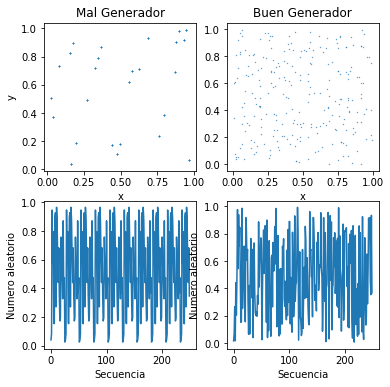

In [26]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(Nsimple[Even], Nsimple[~Even], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Mal Generador')

ax2.scatter(Nrand48[Even], Nrand48[~Even], s=0.1)
ax2.set_xlabel('x')
#ax2.set_ylabel('y')
ax2.title.set_text('Buen Generador')

ax3.plot(Nsimple[Even])
ax3.set_xlabel('Secuencia')
ax3.set_ylabel('Numero aleatorio')

ax4.plot(Nrand48[Even])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Numero aleatorio')

In [37]:
rand = MyRandom(seed = 136, method = 'drand48')

moments = []

points = np.linspace(1, 1e6, 11)

for k in tqdm(range(4)):
    
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]),k+1, 45, 'drand48'))
    moments.append(test)

100%|██████████| 4/4 [00:38<00:00,  9.72s/it]


In [38]:
print(moments[1])

[0.3333170830821254, 0.22252639199629837, 0.06027835138472227, 0.0027908320527068584, 0.31416390131087424, 0.06342249966411549, 0.07365805167003851, 0.02312642330775306, 0.1795456060435752, 0.25822277349358563, 0.26504286658241005]


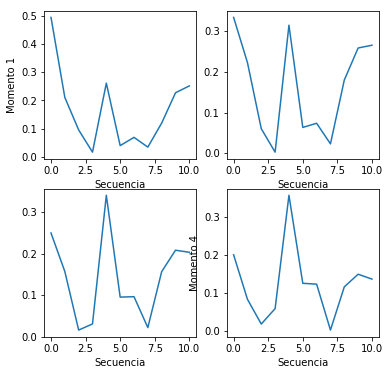

In [39]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(moments[0])
ax1.set_xlabel('Secuencia')
ax1.set_ylabel('Momento 1')

ax2.plot(moments[1])
ax2.set_xlabel('Secuencia')

ax3.plot(moments[2])
ax3.set_xlabel('Secuencia')
#ax3.set_ylabel('Momento 3')

ax4.plot(moments[3])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Momento 4')

plt.show()

In [56]:
#np.random.seed(34)
x = np.random.rand()
print(x)
vec = np.random.rand(3)
print(vec)
matrix = np.random.rand(2,3)
print(matrix)

0.869368745949
[0.6090357  0.80799282 0.82651133]
[[0.27168333 0.83647644 0.28254136]
 [0.1383086  0.71472027 0.47253661]]


In [91]:
posiciones = []

for i in range(10000):
    #posiciones.append(np.random.rand())
    posiciones.append(np.random.uniform(-1,6))

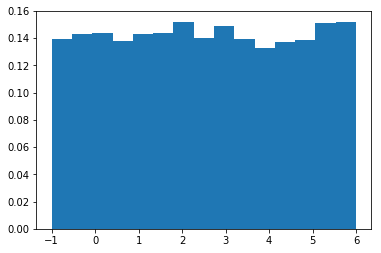

In [92]:
plt.hist(posiciones, 15, density=True)
plt.show()

In [63]:
poisson = []
gauss = []

for i in range(1000):
    poisson = np.append(poisson, np.random.poisson())
    gauss = np.append(gauss, np.random.standard_normal())

Text(0.5,0,'$N$')

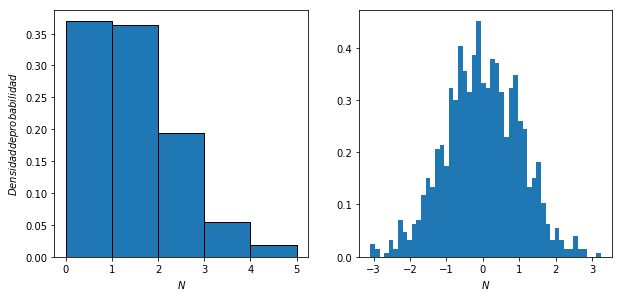

In [69]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.hist(poisson, bins=5, normed=True, edgecolor='black')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$Densidad de probabilidad$')

ax2.hist(gauss, bins=50, normed=True)
ax2.set_xlabel(r'$N$')

$$ \frac{1}{\alpha} e^{-\frac{x}{\alpha}} $$

In [73]:
def Function(x, alpha):
    if(alpha !=0):
        
        return -alpha*np.log(1.-x)
    else:
        return 0.

In [83]:
points = np.zeros(2000)

alpha = 50.
vectorexp=[]

for i in range(2000):
    vectorexp = np.append(vectorexp, Function(np.random.rand(),alpha))

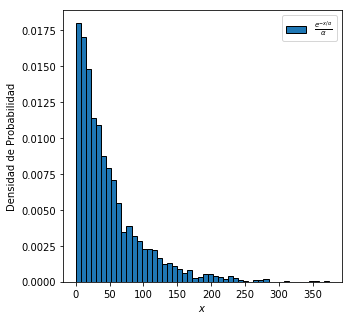

In [84]:
fig = plt.figure(figsize=(5,5))

plt.hist(vectorexp, 50, density=True,  alpha=1, edgecolor = 'black',  linewidth=1, label=r'$\frac{e^{-x /\alpha}}{\alpha}$')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel(r'$x$')
plt.legend(loc=0)
plt.show()


$$ \int_{0}^{1} e^{x} dx = e-1 $$ 

In [96]:
def f(x):
    return np.exp(x)

def integral_exacta():
    return np.exp(1) - 1

def MCintegral( N = 1000 ):
    x = np.random.rand(N)
    return np.sum(f(x))/N


print(MCintegral(), integral_exacta())
    

n_intentos = 10
puntos = np.int_(np.logspace(1,6,n_intentos))
diferencias = np.ones(n_intentos)

for i in range(n_intentos):
    a = integral_exacta()
    b = MCintegral(N = puntos[i])
    diferencias[i] = np.abs( (a-b)/a )  

(1.7045535531473996, 1.718281828459045)


In [1]:
plt.plot(puntos, diferencias)
plt.loglog()
plt.xlabel("$N_{puntos}$")
plt.ylabel("|Error relativo|")
plt.show()

NameError: name 'plt' is not defined